# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])
features = data.data

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
n_clusters = 8 
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(features_std)

In [6]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_

score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")
# The csore is not very good. We want to go till 1.

For n_clusters = 8, silhouette score is 0.5486213604076143)


## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [7]:
n_clusters = 5 
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(features_std)

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")
# The score almost doesn't change but become a little bit bigger

For n_clusters = 5, silhouette score is 0.5489993239795691)


## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [8]:
n_clusters = 3 
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(features_std)

preds = cluster.fit_predict(features)
centers = cluster.cluster_centers_
score = silhouette_score (features, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")
# The score become 3% higher

For n_clusters = 3, silhouette score is 0.5711381937868844)


## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

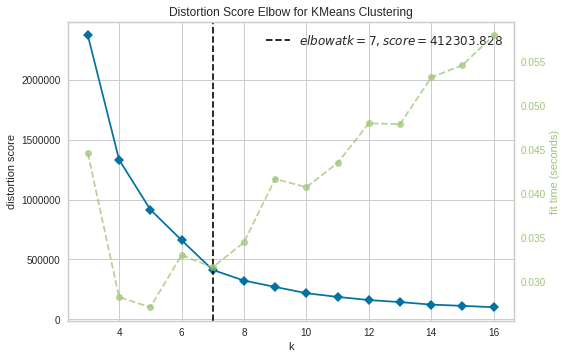

In [12]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(features)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

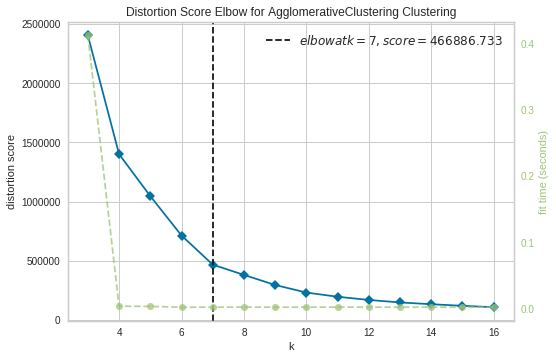

In [13]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

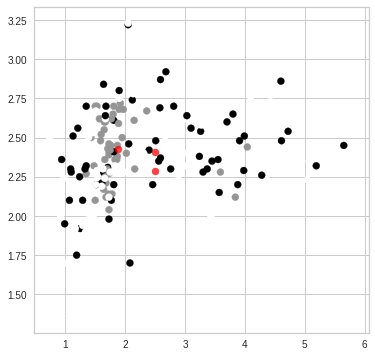

In [17]:
from sklearn.datasets import make_blobs

n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)
model = cluster.fit(X)
preds = cluster.fit_predict(X)


plt.figure(figsize=(6,6))
plt.scatter(X.iloc[:,1],X.iloc[:,2], c=preds)

centers = cluster.cluster_centers_ 
plt.scatter(centers[:, 1], centers[:, 2], c='red', s=50, alpha=0.75)

plt.show()

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 13
Reduced number of features: 1


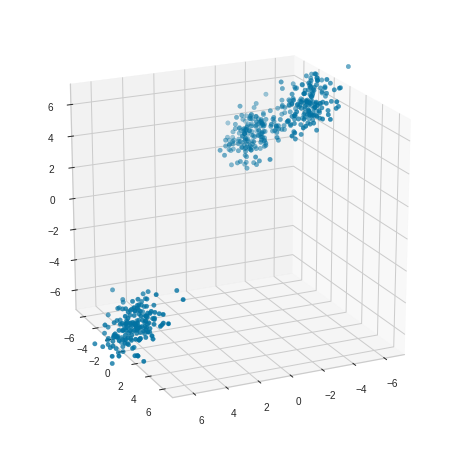

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

X, _ = make_blobs(n_samples=500, n_features=2, centers=3, cluster_std=1.0)

X = np.c_[X, 0.5 * np.random.randn(X.shape[0], 1)]

rot = R.from_euler('y', 45, degrees=True)
X = rot.apply(X)

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.set_xlim(-7, 7)
ax.set_ylim(-7, 7)
ax.set_zlim(-7, 7)

ax.view_init(elev=20, azim=65)
plt.show()

## Bonus

## Generate a series of t-SNE plots showing the clusters at a variety of perplexities.